# Exploratory Analysis of Netherlands Rental Properties Market

### Data from Jan/2019 to Mar/2020 <BR> https://www.kaggle.com/datasets/juangesino/netherlands-rent-properties?resource=download

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import re

import auxiliar_funcs   # Auxiliar functions file created to help on the data processing.

from datetime import datetime, date, timedelta
from tabulate import tabulate

# Viz
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # disable warnin of 'replace()' function

In [2]:
# Import data

df_raw = pd.read_json("properties.json", lines=True)
df_raw.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,...,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},...,1,Shared,Yes,Shared,Felix,4466569.0,20-07-2019,05-07-2018,https://resources.kamernet.nl/Content/images/p...,NaN
3,{'$oid': '5d2b113a43cbfd7c77a9994a'},room-1680036,16 m2,16,Assen,https://resources.kamernet.nl/image/84e95365-6...,done,{'$date': '2019-07-18T22:00:31.018+0000'},"[{'$date': '2019-07-14T11:25:46.988+0000'}, {'...",{'$date': '2019-07-14T11:25:46.988+0000'},...,4,Shared,Yes,Shared,Albert,783341.0,26-07-2019,09-11-2006,https://resources.kamernet.nl/Content/images/p...,NaN
4,{'$oid': '5d2b113b43cbfd7c77a9997c'},room-1691356,22 m2,22,Rotterdam,https://resources.kamernet.nl/Content/images/p...,done,{'$date': '2019-08-12T02:06:14.635+0000'},"[{'$date': '2019-07-14T11:25:47.193+0000'}, {'...",{'$date': '2019-07-14T11:25:47.193+0000'},...,1,Shared,No,Shared,John,3338401.0,19-07-2019,24-08-2014,https://resources.kamernet.nl/image/3177baf7-5...,NaN


# Data Treatment

In [3]:
# Check column names

column_headers = list(df_raw.columns.values)
print(column_headers)

['_id', 'externalId', 'areaRaw', 'areaSqm', 'city', 'coverImageUrl', 'crawlStatus', 'crawledAt', 'datesPublished', 'firstSeenAt', 'furnish', 'lastSeenAt', 'latitude', 'longitude', 'postalCode', 'postedAgo', 'propertyType', 'rawAvailability', 'rent', 'rentDetail', 'rentRaw', 'source', 'title', 'url', 'additionalCosts', 'additionalCostsRaw', 'deposit', 'depositRaw', 'descriptionNonTranslated', 'descriptionNonTranslatedRaw', 'descriptionTranslated', 'descriptionTranslatedRaw', 'detailsCrawledAt', 'energyLabel', 'gender', 'internet', 'isRoomActive', 'kitchen', 'living', 'matchAge', 'matchAgeBackup', 'matchCapacity', 'matchGender', 'matchGenderBackup', 'matchLanguages', 'matchStatus', 'matchStatusBackup', 'pageDescription', 'pageTitle', 'pets', 'registrationCost', 'registrationCostRaw', 'roommates', 'shower', 'smokingInside', 'toilet', 'userDisplayName', 'userId', 'userLastLoggedOn', 'userMemberSince', 'userPhotoUrl', 'additionalCostsDescription']


In [4]:
# Get rid of undesiered columns

df = df_raw[['externalId', 'areaSqm', 'city', 'crawlStatus', 'datesPublished',
            'furnish', 'latitude', 'longitude', 'postalCode', 'postedAgo', 
            'propertyType', 'rent', 'rentDetail', 'deposit', 'energyLabel', 
            'gender', 'internet', 'isRoomActive', 'kitchen', 'living', 'matchAge',
            'matchCapacity', 'matchGender', 'matchLanguages', 'matchStatus', 'pets',
            'registrationCost', 'roommates', 'shower', 'smokingInside', 'toilet', 'userId']]

column_headers = list(df.columns.values)
print(column_headers)

['externalId', 'areaSqm', 'city', 'crawlStatus', 'datesPublished', 'furnish', 'latitude', 'longitude', 'postalCode', 'postedAgo', 'propertyType', 'rent', 'rentDetail', 'deposit', 'energyLabel', 'gender', 'internet', 'isRoomActive', 'kitchen', 'living', 'matchAge', 'matchCapacity', 'matchGender', 'matchLanguages', 'matchStatus', 'pets', 'registrationCost', 'roommates', 'shower', 'smokingInside', 'toilet', 'userId']


In [5]:
# Cleaning bad rows

# 100 lines with 'unavailable' Crawl Status
# len(df.query("crawlStatus == 'unavailable'")) 

bad_rows = df.query("crawlStatus == 'unavailable'").index
df = df.drop(bad_rows, axis=0).reset_index(drop=True)
print(len(df.query("crawlStatus == 'unavailable'")))
df = df.drop(columns=['crawlStatus'])

0


In [6]:
# Treating the publishing date

# Data was last updated in Mar 5th of 2020, acording to kaggle.
# df['postedAgo']

df['postedAgo'] = auxiliar_funcs.cleaner(df['postedAgo'])
df.rename(columns = {'postedAgo':'publishDate'}, inplace = True)

df['publishDate']

0        2020-02-06 00:00:00
1        2020-02-06 00:00:00
2                 2020-07-09
3                 2020-06-17
4        2020-02-06 00:00:00
                ...         
46617    2020-03-03 00:00:00
46618    2020-03-02 00:00:00
46619    2020-03-02 00:00:00
46620    2020-03-02 00:00:00
46621    2020-02-20 00:00:00
Name: publishDate, Length: 46622, dtype: object

In [7]:
# Treating the accepted age range field

# df['matchAge']

df_splitted = auxiliar_funcs.splitter(df['matchAge'])

df['minAge'] = df_splitted['minAge']
df['maxAge'] = df_splitted['maxAge']
df = df.drop(columns=['matchAge'])

df.head()

,externalId,areaSqm,city,datesPublished,furnish,latitude,longitude,postalCode,publishDate,propertyType,...,matchStatus,pets,registrationCost,roommates,shower,smokingInside,toilet,userId,minAge,maxAge
0,room-1686123,14,Rotterdam,"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",Unfurnished,51.896601,4.514993,3074HN,2020-02-06 00:00:00,Room,...,Not important,No,0,5,Shared,No,Shared,4680711.0,16,99
1,studio-1691193,30,Amsterdam,"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",Furnished,52.370200,4.920721,1018AS,2020-02-06 00:00:00,Studio,...,"Working student, Working",No,0,None,Own,No,Own,1865530.0,18,99
2,room-1690545,11,Amsterdam,"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",Furnished,52.350880,4.854786,1075SB,2020-07-09,Room,...,Not important,Yes,None,1,Shared,Yes,Shared,4466569.0,16,93
3,room-1680036,16,Assen,"[{'$date': '2019-07-14T11:25:46.988+0000'}, {'...",Unfurnished,53.013494,6.561012,9407BG,2020-06-17,Room,...,"Student, Working student",No,None,4,Shared,Yes,Shared,783341.0,18,32
4,room-1691356,22,Rotterdam,"[{'$date': '2019-07-14T11:25:47.193+0000'}, {'...",Unfurnished,51.932871,4.479732,3035AK,2020-02-06 00:00:00,Room,...,"Student, Working student, Working",No,None,1,Shared,No,Shared,3338401.0,16,99


In [8]:
# Treating bad values and NaN's 

# roommates
df['roommates'] = df['roommates'].replace(['Unknown'], np.nan).replace(['None', None], 0)
# furnish
df['furnish'] = df['furnish'].replace([''], np.nan)
# rentDetail
df['utilitiesIncl'] = df['rentDetail'].replace(['Utilities incl.'], True).replace([''], False)
df = df.drop(columns=['rentDetail'])
# energyLable
df['energyLabel'] = df['energyLabel'].replace(['Unknown'], np.nan)
# gender
df['gender'] = df['gender'].replace(['Unknown'], np.nan)
# internet
df['internet'] = df['internet'].replace(['Unknown'], np.nan).replace(['Yes'], True).replace(['No'], False)
# isRoomActive
df['isRoomActive'] = df['isRoomActive'].replace(['true'], True).replace(['false'], False)
# registrationCost
df['registrationCost'] = df['registrationCost'].replace(['NA'], np.nan).replace(['None'], 0)
# toilet
df['toilet'] = df['toilet'].replace(['Unknown'], np.nan)

# Tenant Accpetance 

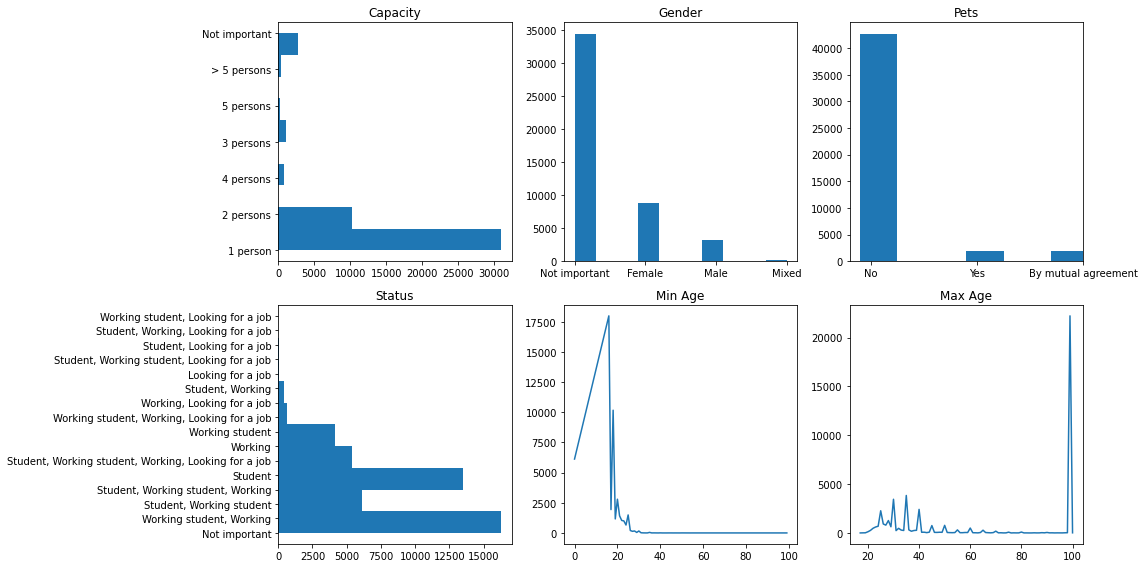

In [9]:
# First look into the acceptance characteristics distribuition

fig, axes = plt.subplots(2,3, figsize=(16,8))

axes[0, 0].hist(df['matchCapacity'], orientation='horizontal'); axes[0, 0].set_title('Capacity')
axes[0, 1].hist(df['matchGender']); axes[0, 1].set_title('Gender')
axes[0, 2].hist(df['pets'], width=0.35, align='left'); axes[0, 2].set_title('Pets')

axes[1, 0].hist(df['matchStatus'], orientation='horizontal'); axes[1, 0].set_title('Status')
axes[1, 1].plot(df.groupby(['minAge'])['minAge'].count()); axes[1, 1].set_title('Min Age')
axes[1, 2].plot(df.groupby(['maxAge'])['maxAge'].count()); axes[1, 2].set_title('Max Age')

fig.tight_layout()

## Identifying the ideal tenant

#### To identify the ideal value on each category, and observe the acceptance rate lost by not being part of it, we will first define the base status in each one.
#### For capacity, gender and status we can use the 'Not important' value. For the age limits we can use 'min= 0' and 'max= 99' values. For pets acceptance we can consider 'Yes' as a base value, since it covers all possibilities.

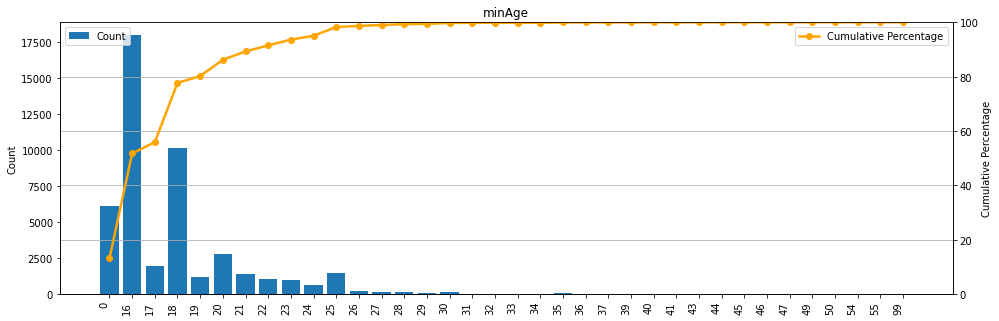

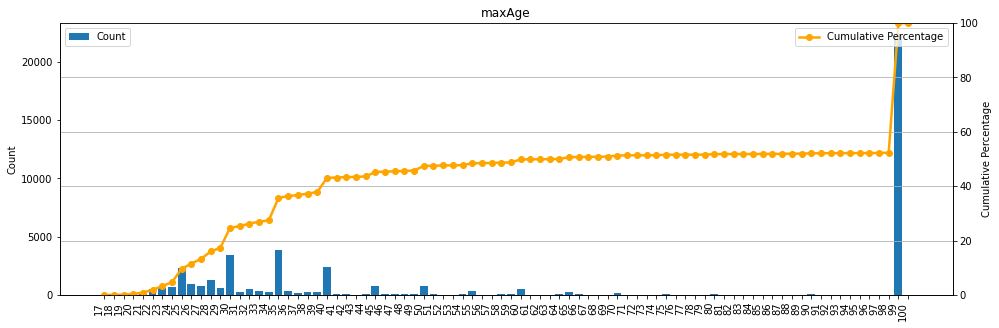

In [10]:
# With the base values defined, we now have to find the ideal values. 
# For the age limits, we can take a look on the Pareto's chart to identify the best age to be used as 'ideal', being the one that's accepted on 80% of the observations.
# On the max age pareto, since nearly half of the observations are 'not important', we can use 40% instead.

df_minAge = df.groupby(['minAge'])['minAge'].count().to_frame().rename(columns={'minAge':'count'})
df_maxAge = df.groupby(['maxAge'])['maxAge'].count().to_frame().rename(columns={'maxAge':'count'})
auxiliar_funcs.pareto(df_minAge, 'minAge')
auxiliar_funcs.pareto(df_maxAge, 'maxAge')

In [11]:
# With the ideal min and max ages defined (19 and 41, respectively), we can proceed with the definition of the 'base' and 'ideal' status in each of the remaining categories.

table = [['characteristic', 'base_value_pct', 'ideal_value_pct'],
         ['capacity', (len(df.query('matchCapacity == "Not important"'))/ len(df))*100, (len(df.query('matchCapacity == "1 person"'))/ len(df))*100],
         ['status',  (len(df.query('matchStatus == "Not important"'))/ len(df))*100, (len(df.query('matchStatus.str.contains("working", case= False) and matchStatus.str.contains("student", case= False)'))/ len(df))*100],
         ['gender',  (len(df.query('matchGender == "Not important"'))/ len(df))*100, (len(df.query('matchGender == "Female"'))/ len(df))*100],
         ['pets',  (len(df.query('pets == "Yes"'))/ len(df))*100, (len(df.query('pets == "No"'))/ len(df))*100],
         ['minAge',  (len(df.query('minAge == 0'))/ len(df))*100, (len(df.query('minAge > 0 and minAge <= 19'))/ len(df))*100],
         ['maxAge',  (len(df.query('maxAge == 99'))/ len(df))*100, (len(df.query('maxAge >= 41 and maxAge < 99'))/ len(df))*100],]

print(tabulate(table))


--------------  ------------------  ------------------
characteristic  base_value_pct      ideal_value_pct
capacity        5.930676504654455   66.2927373343057
status          27.911715499120586  52.631804727381926
gender          73.87499463772468   18.95242589335507
pets            4.171850199476642   91.5576337351465
minAge          13.137574535626959  67.06061516022478
maxAge          47.6727725108318    9.261721933850971
--------------  ------------------  ------------------


In [34]:
# The ideal tenant is sketched: Female, 19-41 yo, works and studies, has no pets and is renting alone.
# It has 23.5% of acceptance (10.957 observations, out of 46.622).
# We can now find the percentage of acceptance lost by not being part of the best accepted status in each category.

df_ideal = df.query('(matchStatus.str.contains("working", case= False) and matchStatus.str.contains("student", case= False)) or matchStatus == "Not important"')
df_ideal = df_ideal.query('matchCapacity == "1 person" or matchCapacity == "Not important"')
df_ideal = df_ideal.query('matchGender == "Female" or matchGender == "Not important"')
df_ideal = df_ideal.query('pets == "No" or pets == "Yes" or pets == "By mutual agreement"') # Which is the same as not filtering anything, but I'll leave it here for didactic purposes.  
df_ideal = df_ideal.query('minAge <= 19 and maxAge >= 41')

ideal_rate = "{:.2f}".format((len(df_ideal)/len(df))*100)
not_status_rate = "{:.2f}".format((len(df_ideal.query('matchStatus == "Not important"'))/len(df))*100)
not_capacity_rate = "{:.2f}".format((len(df_ideal.query('matchCapacity == "Not important"'))/len(df))*100)
not_gender_rate = "{:.2f}".format((len(df_ideal.query('matchGender == "Not important"'))/len(df))*100)
not_pets_rate = "{:.2f}".format((len(df_ideal.query('pets == "Yes"'))/len(df))*100)
not_age_rate = "{:.2f}".format((len(df_ideal.query('minAge > 0 and maxAge < 99'))/len(df))*100)

print(f"Ideal tenant's acceptance: {ideal_rate}%")
print("---------------------------") 
print(f"\nNot female:......................... -{not_gender_rate}%")
print(f"Older than 41, or younger than 19:.. -{not_age_rate}%")
print(f"Doesn't work AND studies:........... -{not_status_rate}%")
print(f"Has a pet:.......................... -{not_pets_rate}%")
print(f"Is renting with other people:....... -{not_capacity_rate}%")


Ideal tenant's acceptance: 23.50%
---------------------------

Not female:......................... -20.32%
Older than 41, or younger than 19:.. -3.15%
Doesn't work AND studies:........... -10.98%
Has a pet:.......................... -0.89%
Is renting with other people:....... -2.28%
